In [2]:
import yfinance as yf
import pandas as pd

# Descargar datos históricos de Yahoo Finance

In [2]:
# Definir los símbolos de los índices
sp500_ticker = "^GSPC" # S&P 500
ibex35_ticker = "^IBEX" # IBEX 35
# Definir el rango de fechas
start_date = "2000-01-01"
end_date = "2024-01-01"
# Descargar los datos históricos desde Yahoo Finance
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)
ibex35_data = yf.download(ibex35_ticker, start=start_date, end=end_date)
# Mostrar las primeras filas de cada dataset
print("S&P 500 Data:")
print(sp500_data.head())
print("\nIBEX 35 Data:")
print(ibex35_data.head())
# Guardar los datos en CSV (opcional)
sp500_data.to_csv("sp500_data.csv")
ibex35_data.to_csv("ibex35_data.csv")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

S&P 500 Data:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000

IBEX 35 Data:
Price              Close          High           Low          Open Volume
Ticker             ^IBEX         ^IBEX         ^IBEX         ^IBEX  ^IBEX
Date                                                                     
2000-01-03  11609.988281  11881.787812  11574.388708  11641.388640      0
2000-01-04  11206.587891  11529.987943  11159.788135  11529.987943      0
2

In [12]:
# Rutas de los CSV
sp500_path = "data/sp500_data.csv"
ibex35_path = "data//ibex35_data.csv"

# Visualizar los datos

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datasets
df_sp500 = pd.read_csv(sp500_path, index_col=0, parse_dates=True)
df_ibex35 = pd.read_csv(ibex35_path, index_col=0, parse_dates=True)

# Eliminar la primera fila que contenía "Ticker"
df_sp500 = df_sp500.iloc[1:].copy()
df_ibex35 = df_ibex35.iloc[1:].copy()

# Convertir las columnas a tipo float
columns_to_convert = ["Close", "High", "Low", "Open", "Volume"]
for col in columns_to_convert:
    df_sp500[col] = pd.to_numeric(df_sp500[col], errors="coerce")
    df_ibex35[col] = pd.to_numeric(df_ibex35[col], errors="coerce")

# Interpolación lineal para manejar valores faltantes
df_sp500.interpolate(method='linear', inplace=True)
df_ibex35.interpolate(method='linear', inplace=True)

# Eliminar filas con valores nulos restantes
df_sp500.dropna(inplace=True)
df_ibex35.dropna(inplace=True)


C:\Users\bruno\AppData\Local\Temp\ipykernel_22112\3912878240.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sp500 = pd.read_csv(sp500_path, index_col=0, parse_dates=True)
C:\Users\bruno\AppData\Local\Temp\ipykernel_22112\3912878240.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ibex35 = pd.read_csv(ibex35_path, index_col=0, parse_dates=True)


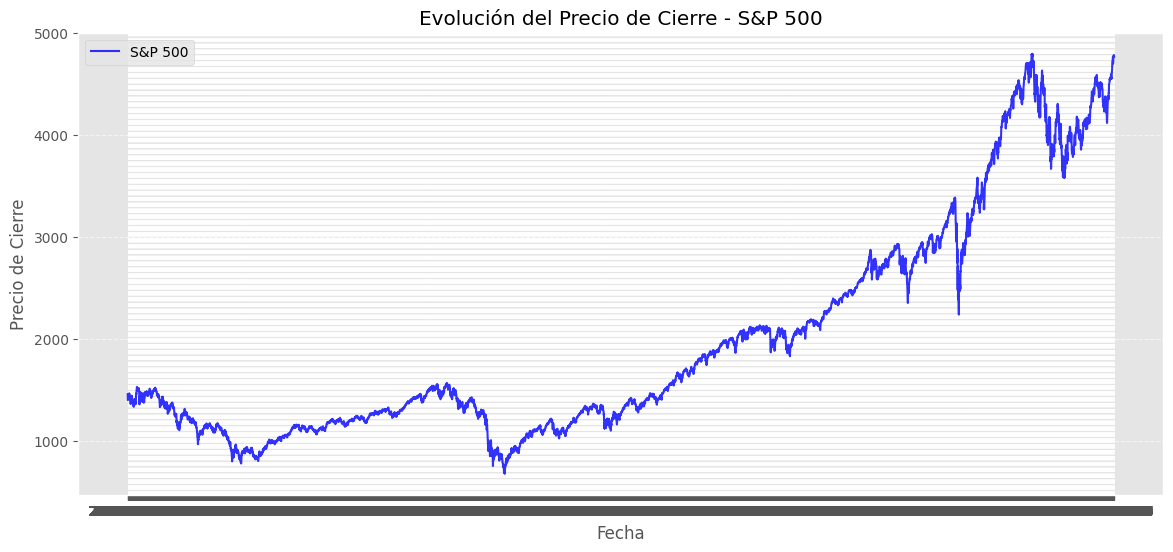

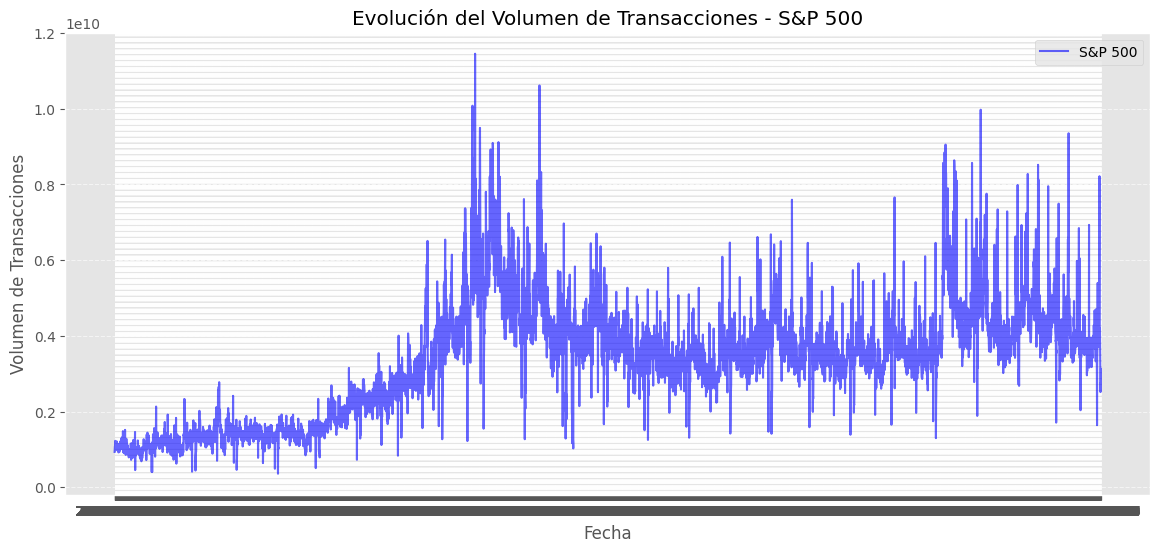

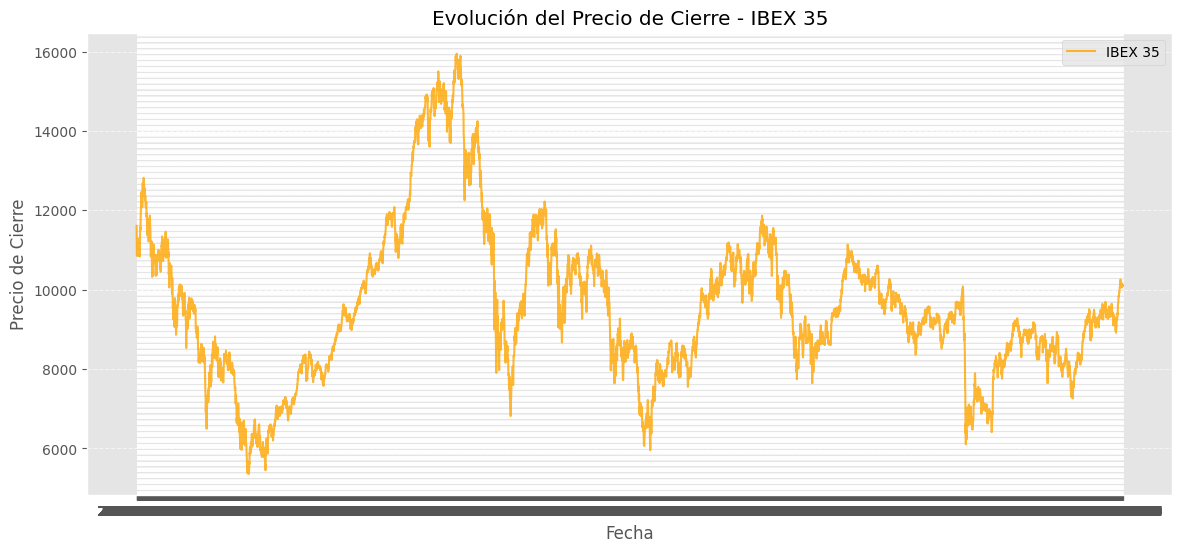

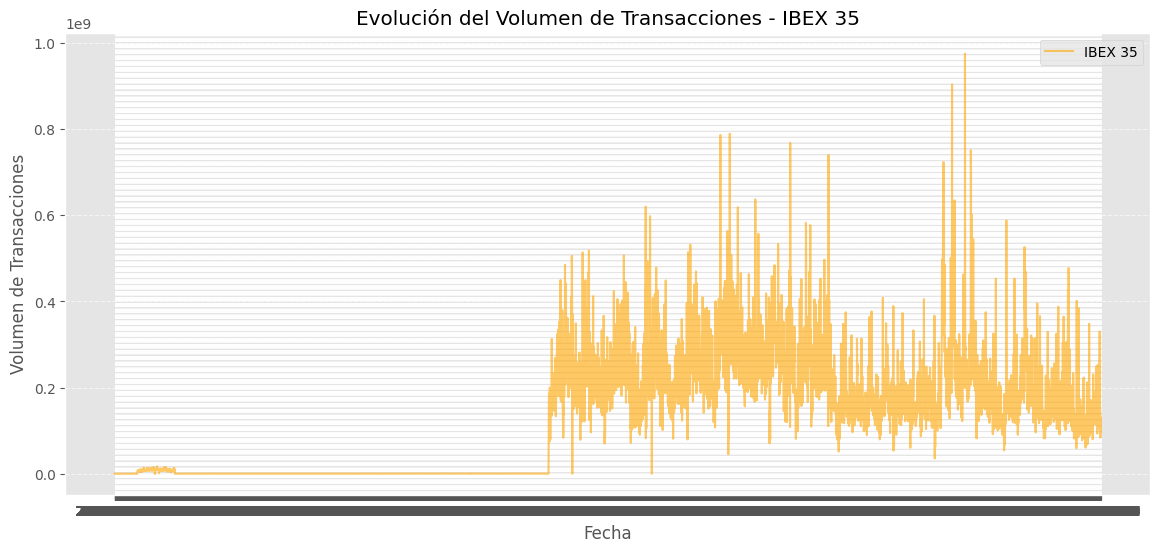

In [17]:
    # Configurar el estilo claro para mejorar la visualización
    plt.style.use("ggplot")

    # Gráfico del precio de cierre del S&P 500
    plt.figure(figsize=(14, 6))
    plt.plot(df_sp500.index, df_sp500["Close"], label="S&P 500", linewidth=1.5, color="blue", alpha=0.8)
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.title("Evolución del Precio de Cierre - S&P 500")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Gráfico del volumen de transacciones del S&P 500
    plt.figure(figsize=(14, 6))
    plt.plot(df_sp500.index, df_sp500["Volume"], label="S&P 500", linewidth=1.5, color="blue", alpha=0.6)
    plt.xlabel("Fecha")
    plt.ylabel("Volumen de Transacciones")
    plt.title("Evolución del Volumen de Transacciones - S&P 500")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Gráfico del precio de cierre del IBEX 35
    plt.figure(figsize=(14, 6))
    plt.plot(df_ibex35.index, df_ibex35["Close"], label="IBEX 35", linewidth=1.5, color="orange", alpha=0.8)
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.title("Evolución del Precio de Cierre - IBEX 35")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Gráfico del volumen de transacciones del IBEX 35
    plt.figure(figsize=(14, 6))
    plt.plot(df_ibex35.index, df_ibex35["Volume"], label="IBEX 35", linewidth=1.5, color="orange", alpha=0.6)
    plt.xlabel("Fecha")
    plt.ylabel("Volumen de Transacciones")
    plt.title("Evolución del Volumen de Transacciones - IBEX 35")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


In [15]:
df_sp500

,Close,High,Low,Open,Volume
Price,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,9.318000e+08
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1.009000e+09
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1.085500e+09
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1.092300e+09
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1.225200e+09
...,...,...,...,...,...
2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3.046770e+09
2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2.513910e+09
2023-12-27,4781.580078,4785.390137,4768.899902,4773.450195,2.748450e+09


In [16]:
df_ibex35

,Close,High,Low,Open,Volume
Price,,,,,
2000-01-03,11609.988281,11881.787812,11574.388708,11641.388640,0.0
2000-01-04,11206.587891,11529.987943,11159.788135,11529.987943,0.0
2000-01-05,10863.088867,11068.088664,10824.889686,11068.088664,0.0
2000-01-07,11102.388672,11137.888634,10882.688708,10882.688708,0.0
2000-01-10,11173.288086,11364.287886,11120.587946,11120.587946,0.0
...,...,...,...,...,...
2023-12-21,10104.299805,10108.500000,10063.299805,10065.400391,84138300.0
2023-12-22,10111.900391,10143.099609,10081.000000,10094.099609,91972000.0
2023-12-27,10121.799805,10146.799805,10077.900391,10091.799805,130947500.0


# Transformación de los datos (IBEX35)

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo CSV del IBEX 35 (ya limpio)
df_ibex35 = pd.read_csv("data/ibex35_data.csv", index_col=0, parse_dates=True)
df_ibex35 = df_ibex35.iloc[1:].copy()

# Convertir columnas a tipo float
columns_to_convert = ["Close", "High", "Low", "Open", "Volume"]
for col in columns_to_convert:
    df_ibex35[col] = pd.to_numeric(df_ibex35[col], errors="coerce")

# Interpolación y eliminación de nulos
df_ibex35.interpolate(method='linear', inplace=True)
df_ibex35.dropna(inplace=True)

# Normalización (Min-Max Scaling)
scaler_ibex35 = MinMaxScaler(feature_range=(0, 1))
df_ibex35_scaled = df_ibex35.copy()
df_ibex35_scaled[columns_to_convert] = scaler_ibex35.fit_transform(df_ibex35[columns_to_convert])

# Crear secuencias para modelos de series temporales
look_back = 30
ibex_close = df_ibex35_scaled[['Close']].values

def crear_secuencias(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i - look_back:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_ibex, y_ibex = crear_secuencias(ibex_close, look_back)

# Separar en entrenamiento (80%) y test (20%)
split_index = int(len(X_ibex) * 0.8)
X_train_ibex, X_test_ibex = X_ibex[:split_index], X_ibex[split_index:]
y_train_ibex, y_test_ibex = y_ibex[:split_index], y_ibex[split_index:]

# Mostrar formas
print("X_train:", X_train_ibex.shape)
print("y_train:", y_train_ibex.shape)
print("X_test:", X_test_ibex.shape)
print("y_test:", y_test_ibex.shape)


X_train: (4857, 30, 1)
y_train: (4857, 1)
X_test: (1215, 30, 1)
y_test: (1215, 1)


C:\Users\bruno\AppData\Local\Temp\ipykernel_11832\4186821800.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ibex35 = pd.read_csv("data/ibex35_data.csv", index_col=0, parse_dates=True)


# Prueba de modelos para Ibex35

## RNN

Epoch 1/20


C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0060 - val_loss: 2.4105e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.7022e-04 - val_loss: 1.8852e-04
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7718e-04 - val_loss: 9.5958e-05
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9276e-04 - val_loss: 1.3036e-04
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7374e-04 - val_loss: 7.8109e-05
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6783e-04 - val_loss: 1.5685e-04
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7046e-04 - val_loss: 7.0706e-05
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3615e-04 - val_loss: 2.4027e-04
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5763e-04 - val_loss: 6.4308e-05
Epoch 10/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2088e-04 - val_loss: 8.0584e-05
Epoch 11/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2004e-04 - 

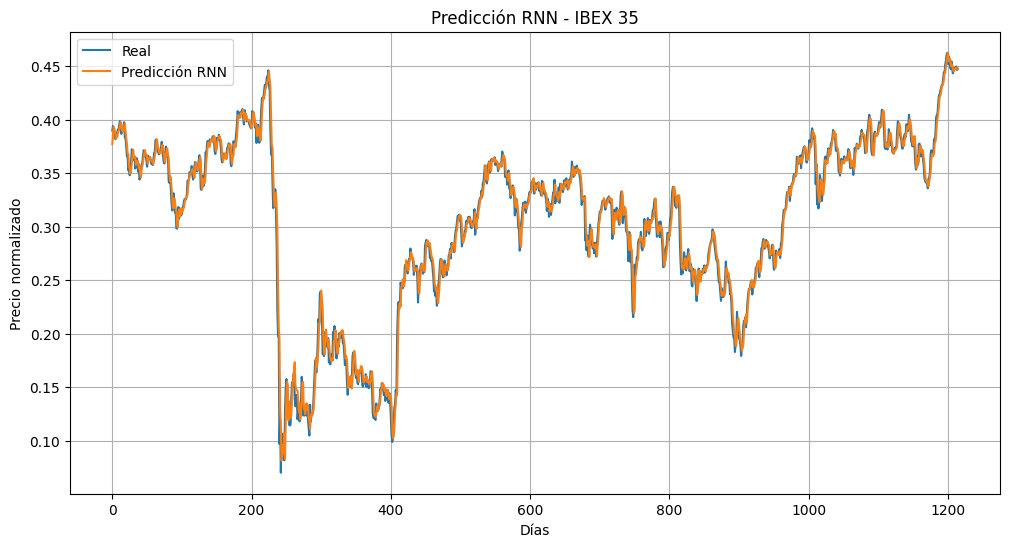

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Modelo RNN
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train_ibex.shape[1], X_train_ibex.shape[2])),
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_rnn = model_rnn.fit(
    X_train_ibex, y_train_ibex,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predicciones
pred_rnn = model_rnn.predict(X_test_ibex)

# Calcular métricas
mse = mean_squared_error(y_test_ibex, pred_rnn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_ibex, pred_rnn)
r2 = r2_score(y_test_ibex, pred_rnn)

print("RNN - MAE:", mae)
print("RNN - RMSE:", rmse)
print("RNN - R2 Score:", r2)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_ibex, label="Real")
plt.plot(pred_rnn, label="Predicción RNN")
plt.title("Predicción RNN - IBEX 35")
plt.xlabel("Días")
plt.ylabel("Precio normalizado")
plt.legend()
plt.grid()
plt.show()


## LSTM

Epoch 1/20


C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0371 - val_loss: 2.5278e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1743e-04 - val_loss: 2.3950e-04
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.5065e-04 - val_loss: 2.4347e-04
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.7311e-04 - val_loss: 2.1966e-04
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.0509e-04 - val_loss: 2.2898e-04
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.7257e-04 - val_loss: 1.9532e-04
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4301e-04 - val_loss: 1.9352e-04
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4631e-04 - val_loss: 2.1192e-04
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2034e-04 - val_loss: 1.7527e-04
Epoch 10/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9639e-04 - val_loss: 1.6481e-04
Epoch 11/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.5843e-04 - 

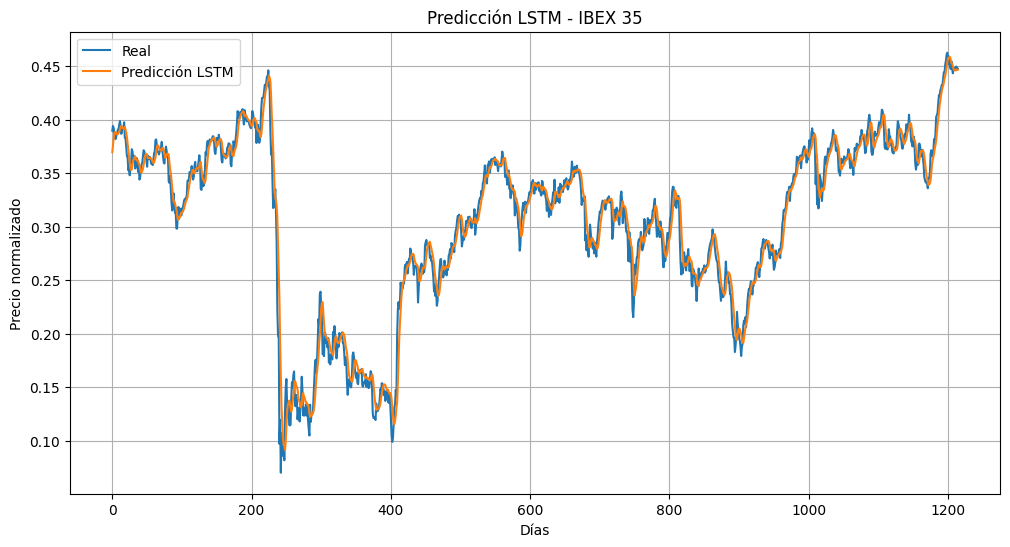

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Modelo LSTM
model_lstm = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train_ibex.shape[1], X_train_ibex.shape[2])),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_lstm = model_lstm.fit(
    X_train_ibex, y_train_ibex,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predicciones
pred_lstm = model_lstm.predict(X_test_ibex)

# Métricas
mse = mean_squared_error(y_test_ibex, pred_lstm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_ibex, pred_lstm)
r2 = r2_score(y_test_ibex, pred_lstm)

print("LSTM - MAE:", mae)
print("LSTM - RMSE:", rmse)
print("LSTM - R2 Score:", r2)

# Gráfico de resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_ibex, label="Real")
plt.plot(pred_lstm, label="Predicción LSTM")
plt.title("Predicción LSTM - IBEX 35")
plt.xlabel("Días")
plt.ylabel("Precio normalizado")
plt.legend()
plt.grid()
plt.show()


## GRU

Epoch 1/20


C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0385 - val_loss: 1.2757e-04
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8039e-04 - val_loss: 1.0971e-04
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4025e-04 - val_loss: 1.0124e-04
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9107e-04 - val_loss: 1.0180e-04
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9497e-04 - val_loss: 8.7718e-05
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7361e-04 - val_loss: 8.4981e-05
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4839e-04 - val_loss: 8.0411e-05
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4612e-04 - val_loss: 9.5571e-05
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4353e-04 - val_loss: 8.0079e-05
Epoch 10/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3803e-04 - val_loss: 7.4308e-05
Epoch 11/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.4218e-

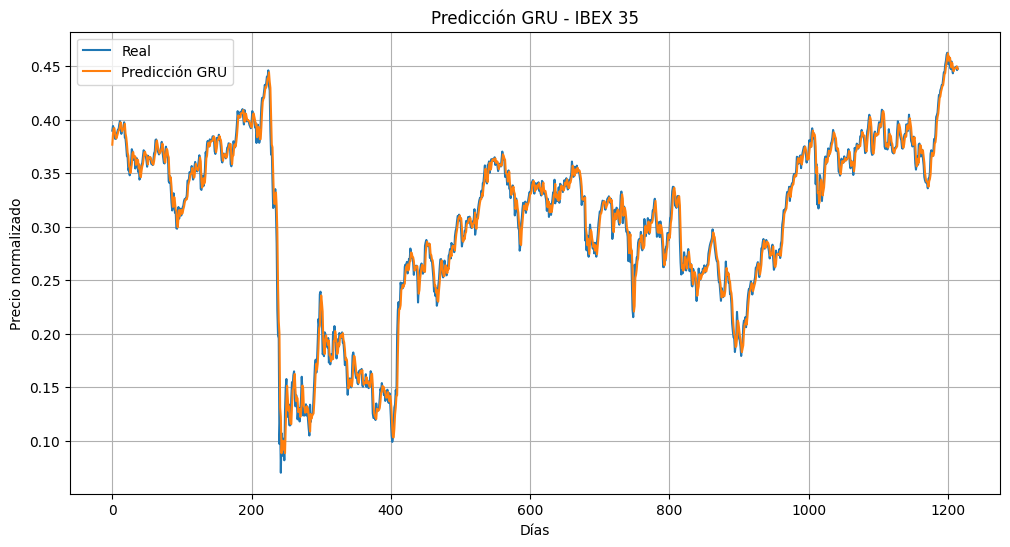

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Modelo GRU
model_gru = Sequential([
    GRU(50, activation='tanh', input_shape=(X_train_ibex.shape[1], X_train_ibex.shape[2])),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_gru = model_gru.fit(
    X_train_ibex, y_train_ibex,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predicciones
pred_gru = model_gru.predict(X_test_ibex)

# Calcular métricas
mse = mean_squared_error(y_test_ibex, pred_gru)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_ibex, pred_gru)
r2 = r2_score(y_test_ibex, pred_gru)

print("GRU - MAE:", mae)
print("GRU - RMSE:", rmse)
print("GRU - R2 Score:", r2)

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_ibex, label="Real")
plt.plot(pred_gru, label="Predicción GRU")
plt.title("Predicción GRU - IBEX 35")
plt.xlabel("Días")
plt.ylabel("Precio normalizado")
plt.legend()
plt.grid()
plt.show()


## Neural Prophet

In [30]:
import pandas as pd
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df_np = df_ibex35[['Close']].copy()

# Asegurarnos de que el índice es datetime y lo convertimos en columna
df_np = df_np.reset_index()
df_np.columns = ['ds', 'y']  # Renombramos columnas directamente

# Convertimos 'ds' a datetime, por si acaso
df_np['ds'] = pd.to_datetime(df_np['ds'])


# División en conjunto de entrenamiento y validación
split_index = int(len(df_np) * 0.8)
df_train_np = df_np.iloc[:split_index]
df_val_np = df_np.iloc[split_index:]

import numpy as np
np.NaN = np.nan  #  hack para arreglar incompatibilidad con NeuralProphet



In [32]:
model_np = NeuralProphet(
    n_forecasts=7,              # 7 días a futuro
    n_lags=30,                  # Usa los últimos 30 días
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    learning_rate=0.01,
    normalize=False             # No normalizamos para mantener escala real
)

# Entrenamiento
metrics = model_np.fit(df_train_np, freq="D", epochs=300, checkpointing=False)

# %% [Predicción sobre validación]
future = model_np.make_future_dataframe(df_val_np, n_historic_predictions=True)
forecast = model_np.predict(future)

# Eliminar cualquier fila con NaN en forecast
forecast_clean = forecast.dropna(subset=['yhat1'])

# Alinear con df_val_np
# Nos quedamos solo con las fechas que aparecen tanto en forecast limpio como en df_val_np
common_dates = df_val_np['ds'].isin(forecast_clean['ds'])
df_val_np_clean = df_val_np[common_dates]
forecast_clean = forecast_clean[forecast_clean['ds'].isin(df_val_np_clean['ds'])]

# Extraer valores
y_true = df_val_np_clean['y'].values
y_pred = forecast_clean['yhat1'].values

# Métricas
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.218% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\bruno\PycharmProjects\ IBEX_35_S&P

Epoch 300: 100%|██████████| 300/300 [00:00<00:00, 506.60it/s, loss=122, v_num=7, MAE=162.0, RMSE=228.0, Loss=122.0, RegLoss=0.000]        

WARNING - (py.warnings._showwarnmsg) - C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.69% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\bruno\PycharmProjects\ IBEX_35_S&P_500\.venv\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed i


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 90.06it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


TypeError: got an unexpected keyword argument 'squared'

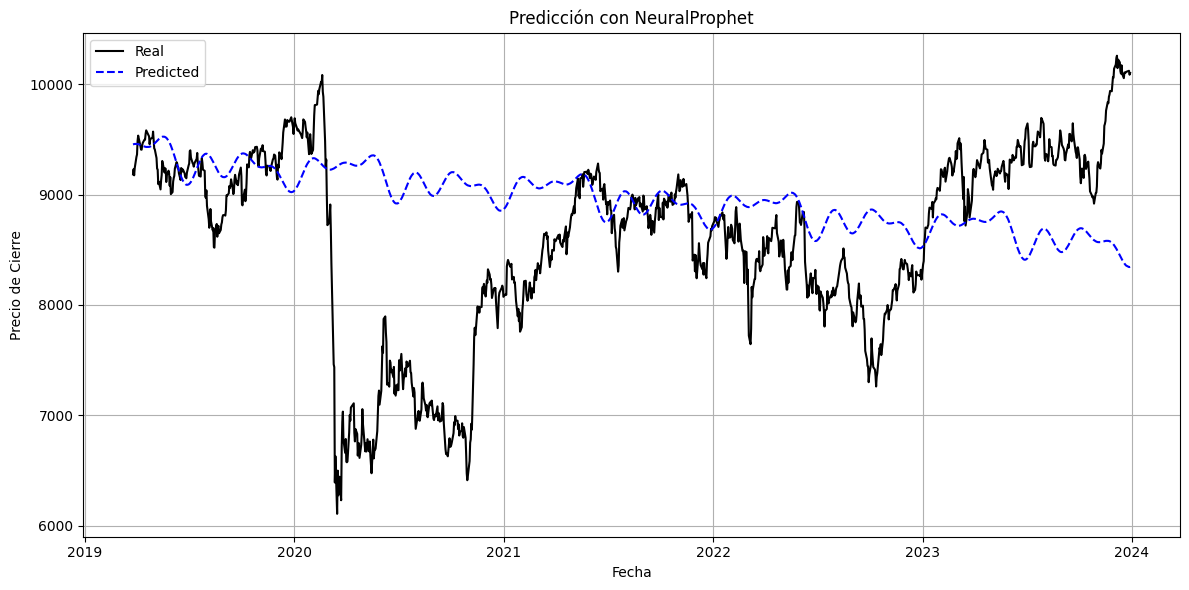

In [27]:
import matplotlib.pyplot as plt

# Aseguramos que las longitudes coincidan
df_plot = df_val_np.copy()
df_plot["Predicted"] = forecast["yhat1"].values

plt.figure(figsize=(12, 6))
plt.plot(df_plot["ds"], df_plot["y"], label="Real", color="black")
plt.plot(df_plot["ds"], df_plot["Predicted"], label="Predicted", color="blue", linestyle="--")
plt.title("Predicción con NeuralProphet")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
